# The Burman Traveling Salesman Problem 

In [1]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Consts
from pyevolve import Mutators
from pyevolve import DBAdapters

import geopy.distance
import random

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

coordinates = list(zip(LAT, LON))

In [3]:
def distance(origin, dest):
    """
    Calculate the distance between two lat, long coordinates.

    Parameters
    ----------
    `origin` : tuple of float (lat, long)
    `dest`   : tuple of float (lat, long)

    Returns
    -------
    distance_in_km : float
    """
    return geopy.distance.distance(origin, dest).km

In [4]:
def distance_matrix(coord):
    """
    Calculate the distances between all the towns in a list
    
    Parameters
    ----------
    `coord` : List of tuples (lat, long) representing towns
    
    Returns
    -------
    Matrix containing the distances between each town
    """

    matrix = {}
    for i, origin in enumerate(coord):
        for j, dest in enumerate(coord):
            matrix[i, j] = distance(origin, dest)
    return matrix

In [5]:
def fitness(genome):
    """
    Fitness function for the genetic algorithm
        
    Parameters
    ----------
    `genome` : the genome to fit
    
    Returns
    -------
    The score of the given genome
    """
    global distances
    
    score = 0.0

    for i in range(len(genome)):
        # get index of the next city
        # note: when the src city is the last one in
        #       the chromosome, the next one is the first one.
        #       hence the modulo
        j = (i + 1) % len(genome)  
        score += distances[genome[i], genome[j]]
    return score

In [6]:
def init(genome, **kwargs):
    """
    Init function for the genetic algorithm
    """
    genome.clearList()
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)

    for city in lst:
        genome.append(city)

In [10]:
global distances

distances = distance_matrix(coordinates)

genome = G1DList.G1DList(len(coordinates))

genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.initializator.set(init)

genome.setParams(rangemin=0, rangemax=len(coordinates)-1)

ga = GSimpleGA.GSimpleGA(genome)

ga.setPopulationSize(280)
ga.setMutationRate(0.02)
ga.setCrossoverRate(0.9)

ga.setMinimax(Consts.minimaxType['minimize'])

# Record evolution results in a database
ga.setDBAdapter(DBAdapters.DBSQLite(identify="tsp"))

ga.setGenerations(25)

ga.evolve(freq_stats=10)

ga.bestIndividual()


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [8129.47(8538.44)/5303.20(4859.08)/6774.56(6774.56)]
Gen. 10 (40.00%): Max/Min/Avg Fitness(Raw)             [4422.28(5901.52)/3619.32(3487.02)/3685.24(3685.24)]
Gen. 20 (80.00%): Max/Min/Avg Fitness(Raw)             [4282.79(5873.77)/3500.16(3346.76)/3568.99(3568.99)]
Gen. 25 (100.00%): Max/Min/Avg Fitness(Raw)             [4309.38(6357.93)/3527.71(3346.76)/3591.15(3591.15)]
Total time elapsed: 0.278 seconds.


- GenomeBase
	Score:			 3346.761974
	Fitness:		 3527.709471

	Params:		 {'rangemin': 0, 'rangemax': 13}

	Slot [Evaluator] (Count: 1)
		Name: fitness - Weight: 0.50
		Doc: 
    Fitness function for the genetic algorithm
        
    Parameters
    ----------
    `genome` : the genome to fit
    
    Returns
    -------
    The score of the given genome
    
	Slot [Initializator] (Count: 1)
		Name: init - Weight: 0.50
		Doc: 
    Init function for the genetic algorithm
    
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator

    .. note:: this mutator is :term:`Data Type Independent`

    
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverSinglePoint - Weight: 0.50
		Doc:  The crossover of G1DList, Single Point

    .. warning:: You can't use this crossover method for lists with just one element.

    

- G1DList
	List size:	 14
	List:		 [7, 12, 6, 11, 5, 4, 3, 2, 13, 1, 0, 9, 8, 10]


Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
25 generations found !


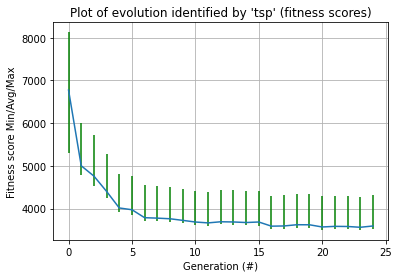

In [11]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ~/.conda/envs/mlg_ga/bin/pyevolve_graph.py -i tsp -2

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
25 generations found !


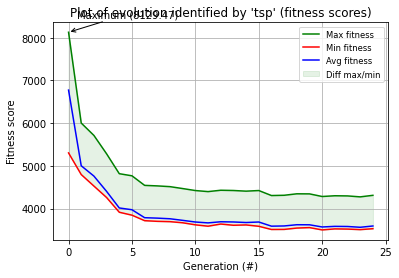

In [12]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ~/.conda/envs/mlg_ga/bin/pyevolve_graph.py -i tsp -4